In [1]:
%load_ext jupyter_black
%matplotlib inline

In [2]:
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt

import glob
import xarray as xr
from datetime import datetime
import pandas as pd

In [ ]:


files = glob.glob("/workspaces/griblib/archive/*_nc")
files


def generate():
    for file in files:
        ds = xr.open_dataset(file)
        vt = pd.to_datetime(
            datetime(*[int(ds.attrs[x]) for x in ("year", "month", "day", "hour", "minute", "second")])
        )
        yield ds.expand_dims({"validTime": [vt.value]})


df = xr.concat(generate(), dim="validTime").to_dataframe(["validTime", "MSL_alt"])

df["DateTime"] = pd.to_datetime(df.index.get_level_values("validTime"))

df.set_index(["DateTime", "GEO_lat", "GEO_lon"], append=True).dropna(axis=0, how="all").droplevel(0).reorder_levels(
    ["DateTime", "GEO_lat", "GEO_lon", "MSL_alt"]
)

In [3]:
# FROM  https://data.cosmic.ucar.edu/gnss-ro/cosmic2/postProc/level2/2021/001/ivmL2m_postProc_2021_001.tar.gz
glob("data/*")

['data/ivmL2m_C2E1.2021.001.01_2019.3430_nc',
 'data/ivmL2m_C2E5.2021.001.01_2019.3430_nc',
 'data/ivmL2m_C2E6.2021.001.01_2019.3430_nc',
 'data/ivmL2m_C2E3.2021.001.01_2019.3430_nc',
 'data/ivmL2m_C2E2.2021.001.01_2019.3430_nc',
 'data/ivmL2m_C2E4.2021.001.01_2019.3430_nc']

In [4]:
df = xr.open_dataset(glob("data/*")[0], engine="netcdf4", chunks={}).to_pandas().dropna(axis=1, how="all")
df

,ion_dens,orig_ion_density,ap_pot,uts,sc_flag,rpa_flag,dm_flag,ap_pot_var,alt,lat,mlt,lon,mlat,apex_lon,apex_height
time,,,,,,,,,,,,,,,
2021-01-01 00:00:01.524000000,31895.478516,41612.964844,-1.236648,2020-12-31 23:59:50,11,0,0,6.974878e-12,549.695740,-0.012480,0 days 18:03:35.998077600,-84.200096,10.880000,-11.20,805.409973
2021-01-01 00:00:02.524000000,31508.910156,41209.808594,-1.247842,2020-12-31 23:59:50,11,0,0,1.900283e-12,549.695740,-0.012480,0 days 18:03:35.998077600,-84.200096,10.880000,-11.20,805.409973
2021-01-01 00:00:03.524000000,31965.539062,41663.812500,-1.179942,2020-12-31 23:59:50,11,0,0,1.441225e-11,549.695740,-0.012480,0 days 18:03:35.998077600,-84.200096,10.880000,-11.20,805.409973
2021-01-01 00:00:04.524000000,31506.828125,41198.914062,-1.259505,2020-12-31 23:59:50,11,0,0,1.988060e-12,549.695740,-0.012480,0 days 18:03:35.998077600,-84.200096,10.880000,-11.20,805.409973
2021-01-01 00:00:05.524000000,31712.240234,41412.605469,-1.182674,2020-12-31 23:59:50,11,0,0,1.297787e-04,549.695740,-0.012480,0 days 18:03:35.998077600,-84.200096,10.880000,-11.20,805.409973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 23:59:56.154000128,25967.013672,35405.925781,NaN,2021-01-01 23:59:38,3,0,0,9.849402e-13,547.345764,14.688529,0 days 20:13:11.997526800,-56.128998,18.309999,21.32,1304.750000
2021-01-01 23:59:57.154000128,25074.396484,34495.648438,-0.744261,2021-01-01 23:59:38,3,0,0,1.567832e-14,547.345764,14.688529,0 days 20:13:11.997526800,-56.128998,18.309999,21.32,1304.750000
2021-01-01 23:59:58.154000128,26173.662109,35623.664062,NaN,2021-01-01 23:59:38,3,0,0,4.329890e-13,547.345764,14.688529,0 days 20:13:11.997526800,-56.128998,18.309999,21.32,1304.750000


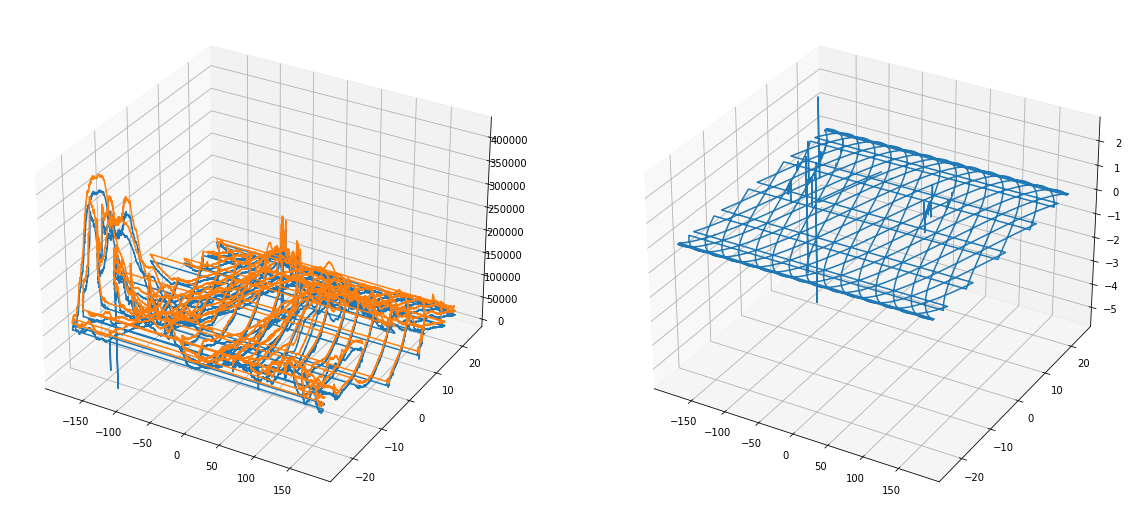

In [15]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.plot(
    df.lon,
    df.lat,
    df.ion_dens,
)
ax.plot(
    df.lon,
    df.lat,
    df.orig_ion_density,
)
ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.plot(
    df.lon,
    df.lat,
    (abs(df.orig_ion_density - df.ion_dens) / (((df.orig_ion_density + df.ion_dens) / 2) * 100)),
)